<a href="https://colab.research.google.com/github/KayKozaronek/03_Courses/blob/master/Course_2_Part_4_Lesson_4_Human_vs_Horse_Image_Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Augmentation on the Horses vs Humans Dataset

In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip \
    -O /tmp/validation-horse-or-human.zip
  
# imports
import tensorflow as tf 
import zipfile 
import os 
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# create local zips and extract them from the two !wget statements
local_zip = "/tmp/horse-or-human.zip"
zip_ref = zipfile.ZipFile(local_zip,"r")
zip_ref.extractall("/tmp/horse-or-human")

local_zip = "/tmp/validation-horse-or-human.zip"
zip_ref = zipfile.ZipFile(local_zip, "r")
zip_ref.extractall("/tmp/validation-horse-or-human")
zip_ref.close()


# create training and validation directories
training_horse_dir = os.path.join("/tmp/horse-or-human", "horses")
training_human_dir = os.path.join("/tmp/horse-or-human", "humans")
validation_horse_dir = os.path.join("/tmp/validation-horse-or-human", "horses")
validation_human_dir = os.path.join("/tmp/validation-horse-or-human", "humans")

--2020-05-02 10:22:40--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.212.128, 2607:f8b0:4001:c14::80
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.212.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M   131MB/s    in 1.1s    

2020-05-02 10:22:41 (131 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]

--2020-05-02 10:22:42--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.124.128, 2607:f8b0:4001:c14::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.124.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [application

In [2]:
# create a CNN
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32,(3,3),input_shape=(300,300,3),activation="relu"),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64,(3,3),activation="relu"),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128,(3,3),activation="relu"),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128,(3,3),activation="relu"),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation ="relu"),
  tf.keras.layers.Dense(1,activation = "sigmoid")
])

# compile the model 
model.compile(optimizer = RMSprop(lr = 1e-4),
              metrics = ["accuracy"],
              loss = "binary_crossentropy")

# Do Image Augmentation on training and validation data
train_datagen = ImageDataGenerator(
    rescale = 1./255.,
    rotation_range = 40, #Degrees
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    fill_mode="nearest",
    horizontal_flip =True,
)

val_datagen = ImageDataGenerator(
     rescale = 1./255.,
    rotation_range = 40, #Degrees
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    fill_mode="nearest",
    horizontal_flip =True,
)

# Flow images in batches of 128 using train_datagen generator
training_generator = train_datagen.flow_from_directory(
    "/tmp/horse-or-human/", #Source directory for training images
    batch_size=128,
    target_size=(300,300),
    class_mode ="binary"
)

# Flow training images in batches of 128 using train_datagen generator
val_generator = val_datagen.flow_from_directory(
    "/tmp/horse-or-human",
    batch_size = 32,
    target_size=(300,300),
    class_mode = "binary"
)

Found 1027 images belonging to 2 classes.
Found 1027 images belonging to 2 classes.


In [4]:
# run/fit the model 
history = model.fit(
    training_generator,
    steps_per_epoch =8,
    epochs=50,
    verbose =1,
    validation_data=val_generator,
    validation_steps =8,
      
)

Epoch 1/50
8/8 [==============================] - 31s 4s/step - loss: 0.4922 - accuracy: 0.7820 - val_loss: 0.5883 - val_accuracy: 0.7109
Epoch 2/50
8/8 [==============================] - 28s 3s/step - loss: 0.5619 - accuracy: 0.7608 - val_loss: 0.4373 - val_accuracy: 0.7969
Epoch 3/50
8/8 [==============================] - 28s 3s/step - loss: 0.5249 - accuracy: 0.7386 - val_loss: 0.4111 - val_accuracy: 0.8203
Epoch 4/50
8/8 [==============================] - 27s 3s/step - loss: 0.5668 - accuracy: 0.7731 - val_loss: 0.4241 - val_accuracy: 0.8282
Epoch 5/50
8/8 [==============================] - 28s 4s/step - loss: 0.4171 - accuracy: 0.7998 - val_loss: 0.4505 - val_accuracy: 0.7852
Epoch 6/50
8/8 [==============================] - 28s 4s/step - loss: 0.5755 - accuracy: 0.7608 - val_loss: 0.4115 - val_accuracy: 0.8164
Epoch 7/50
8/8 [==============================] - 28s 3s/step - loss: 0.4527 - accuracy: 0.7942 - val_loss: 0.4734 - val_accuracy: 0.7734
Epoch 8/50
8/8 [==================

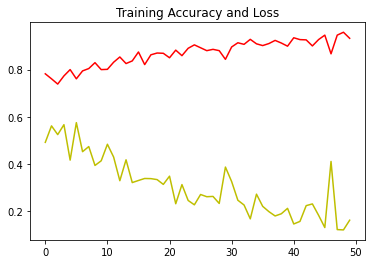

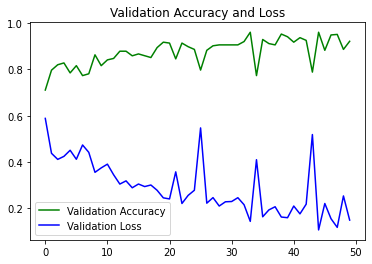

In [5]:
# plot it 
import matplotlib.pyplot as plt

acc = history.history["accuracy"]
loss = history.history["loss"]
val_acc = history.history["val_accuracy"]
val_loss = history.history["val_loss"]
epochs = range(len(acc))

plt.plot(epochs, acc, "r", label = "Training accuracy")
plt.plot(epochs, loss, "y", label = "Training loss")
plt.title("Training Accuracy and Loss")

plt.figure()

plt.plot(epochs, val_acc, "g",label = "Validation Accuracy")
plt.plot(epochs, val_loss, "b", label = "Validation Loss")
plt.title("Validation Accuracy and Loss")

plt.legend()
plt.show()